# Bandit Problem

In [147]:
# imports
from bandits import Bandit
import random
import matplotlib.pyplot as plt
import numpy as np

A list of ten bandit objects initialized in the list...

In [183]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [149]:
bandits[0].pullLever()

0.12425370474404351

## Greedy algorithm Implementation

In [150]:
def run_greedy():
    rewards=[0]
    avglist=[0 for _ in range(10)]
    nlist=[0 for _ in range(10)]
    for _ in range(10000):
        max_value=max(avglist)
        max_indices=[]
        for i in range(10):
            if (avglist[i]==max_value):
                max_indices.append(i)
        chosen_lever=random.choice(max_indices)
        obtained=bandits[chosen_lever].pullLever()
        rewards.append(rewards[-1]+obtained)
        avglist[chosen_lever]=(((nlist[chosen_lever])*(avglist[chosen_lever]))+obtained)/(nlist[chosen_lever]+1)
        nlist[chosen_lever]+=1
    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

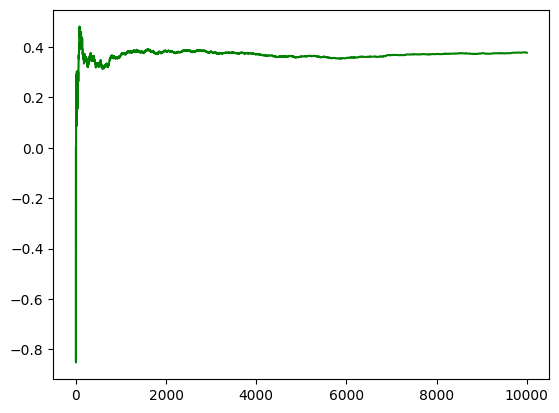

In [151]:
cumu_rewards=run_greedy()
rewardsavg=[0]
for i in range(10000):
    rewardsavg.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg, 'green')
plt.show()

## $\epsilon$-greedy Algorithm

In [181]:
def run_epsilon_greedy(epsilon):
    rewards=[0]
    avglist=[0 for _ in range(10)]
    nlist=[0 for _ in range(10)]
    for _ in range(10000):
        if (random.random()>epsilon):
            max_value=max(avglist)
            max_indices=[]
            for i in range(10):
                if (avglist[i]==max_value):
                    max_indices.append(i)
            chosen_lever=random.choice(max_indices)
        else:
            chosen_lever=random.choice(range(10))
        obtained=bandits[chosen_lever].pullLever()
        rewards.append(rewards[-1]+obtained)
        avglist[chosen_lever]=(((nlist[chosen_lever])*(avglist[chosen_lever]))+obtained)/(nlist[chosen_lever]+1)
        nlist[chosen_lever]+=1
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

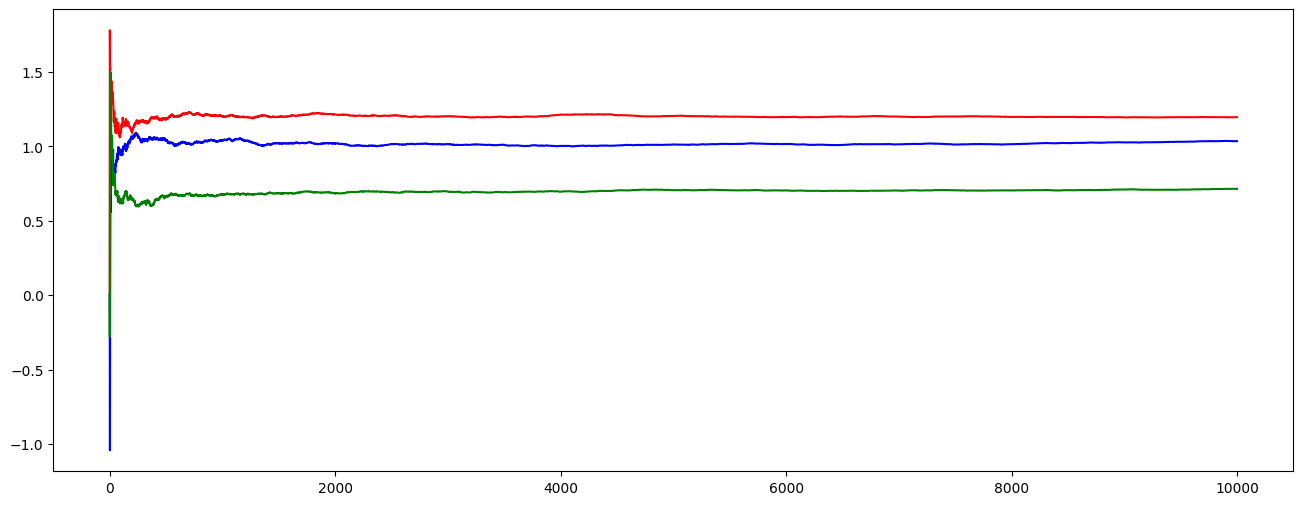

In [153]:
plt.figure(figsize=(16,6))
cumu_rewards=run_epsilon_greedy(0.1)
rewardsavg1=[0]
for i in range(10000):
    rewardsavg1.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg1, 'blue')
cumu_rewards=run_epsilon_greedy(0.01)
rewardsavg2=[0]
for i in range(10000):
    rewardsavg2.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg2, 'red')
cumu_rewards=run_epsilon_greedy(0)
rewardsavg3=[0]
for i in range(10000):
    rewardsavg3.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg3, 'green')
plt.show()
# red means 0.01, blue means 0.1, green means 0. I was thinking of putting legend, but i got such a nice graph that i didn't want to run it again lol.

In [ ]:
#It is very evident that epsilon-greedy strategy performs better than greedy strategy in long term. Along with that, if the number of iterations is huge, then a lower epsilon value gives 
# a better result as after a huge number of iterations, the expected rewards are mostly accuratley determined and after that point a lower epslion means more often the best one is chosen
#leading to a better result.

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [156]:
def run_epsilon_greedy(epsilon):
    rewards=[0]
    avglist=[0 for _ in range(10)]
    nlist=[0 for _ in range(10)]
    for _ in range(1000):
        if (random.random()>epsilon):
            max_value=max(avglist)
            max_indices=[]
            for i in range(10):
                if (avglist[i]==max_value):
                    max_indices.append(i)
            chosen_lever=random.choice(max_indices)
        else:
            chosen_lever=random.choice(range(10))
        obtained=bandits[chosen_lever].pullLever()
        rewards.append(rewards[-1]+obtained)
        avglist[chosen_lever]=(((nlist[chosen_lever])*(avglist[chosen_lever]))+obtained)/(nlist[chosen_lever]+1)
        nlist[chosen_lever]+=1
    return rewards

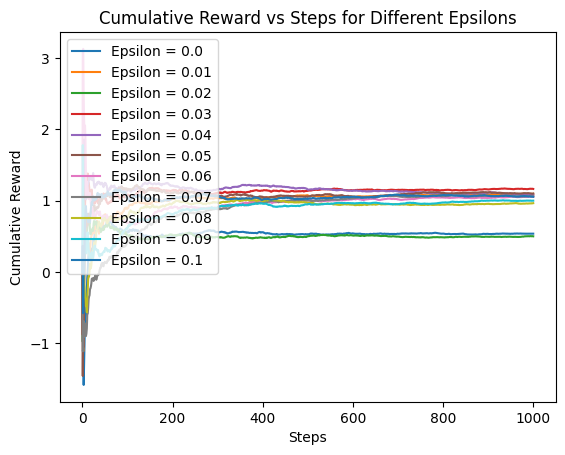

In [176]:
for i in range(11):
    epsilon = 0.01 * i
    cumu_rewards = run_epsilon_greedy(epsilon)
    rewardsavg=[0]
    for i in range(1000):
        rewardsavg.append(cumu_rewards[i+1]/(i+1))
    plt.plot(rewardsavg, label=f'Epsilon = {epsilon}')

plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward vs Steps for Different Epsilons")
plt.legend()
plt.show()


## Optimistic Initial Values

In [184]:
def run_optimistic_greedy():
    rewards=[0]
    qlist=[10 for _ in range(10)]
    nlist=[0 for _ in range(10)]
    for _ in range(10000):
        max_value=max(qlist)
        max_indices=[]
        for i in range(10):
            if (qlist[i]==max_value):
                max_indices.append(i)
        chosen_lever=random.choice(max_indices)
        obtained=bandits[chosen_lever].pullLever()
        rewards.append(rewards[-1]+obtained)
        qlist[chosen_lever]=qlist[chosen_lever]+(0.1*(obtained-qlist[chosen_lever]))
        nlist[chosen_lever]+=1
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

10001


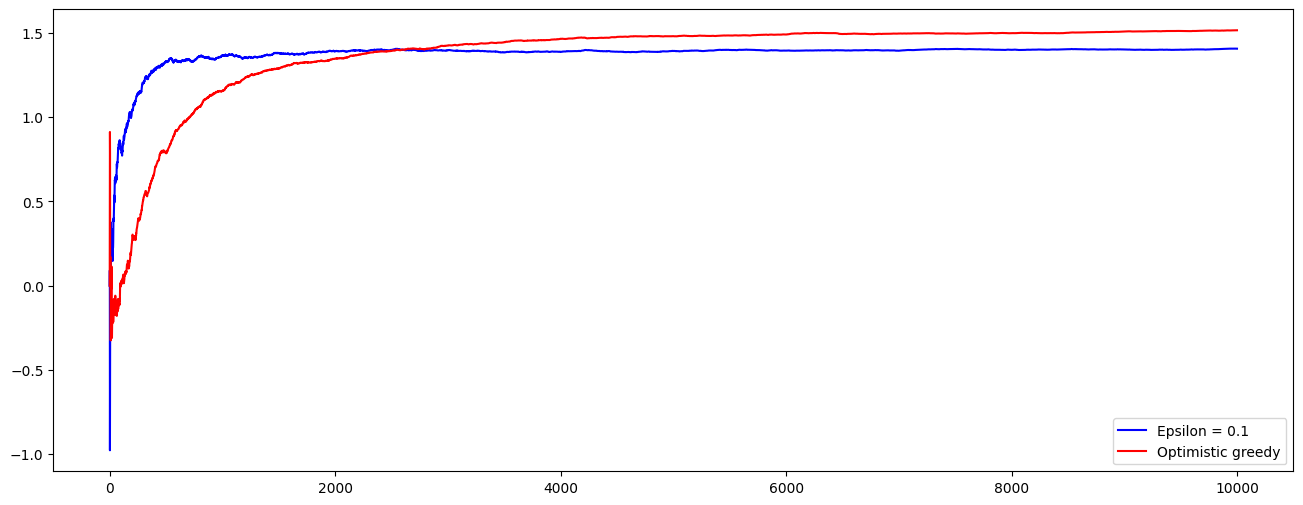

In [ ]:
plt.figure(figsize=(16,6))
cumu_rewards=run_epsilon_greedy(0.1)
rewardsavg=[0]
for i in range(10000):
    rewardsavg.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg, label='Epsilon = 0.1', color='blue')
cumu_rewards=run_optimistic_greedy()
rewardsavg=[0]
for i in range(10000):
    rewardsavg.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg, label="Optimistic greedy", color='red')
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [189]:
def run_ucb(c):
    rewards=[0]
    avglist=[0 for _ in range(10)]
    nlist=[0 for _ in range(10)]
    for _ in range(10000):
        max_indices=[]
        if (min(nlist)==0):
            for i in range(10):
                if (nlist[i]==0):
                    max_indices.append(i)
        else:
            vals=[]
            for i in range(10):
                vals.append(avglist[i]+(c*np.sqrt((np.log(_+1))/(nlist[i]))))
            max_value=max(vals)
            for i in range(10):
                if (vals[i]==max_value):
                    max_indices.append(i)
        chosen_lever=random.choice(max_indices)
        obtained=bandits[chosen_lever].pullLever()
        rewards.append(rewards[-1]+obtained)
        avglist[chosen_lever]=(((nlist[chosen_lever])*(avglist[chosen_lever]))+obtained)/(nlist[chosen_lever]+1)
        nlist[chosen_lever]+=1
    return rewards

10001


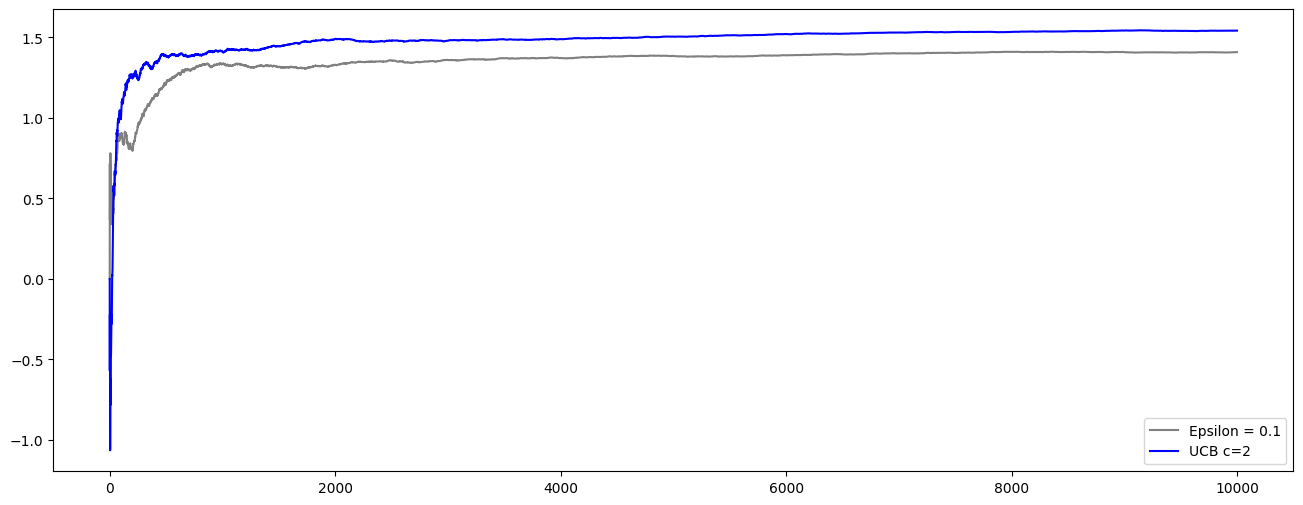

In [190]:
plt.figure(figsize=(16,6))
cumu_rewards=run_epsilon_greedy(0.1)
rewardsavg=[0]
for i in range(10000):
    rewardsavg.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg, label='Epsilon = 0.1', color='grey')
cumu_rewards=run_ucb(2)
rewardsavg=[0]
for i in range(10000):
    rewardsavg.append(cumu_rewards[i+1]/(i+1))
plt.plot(rewardsavg, label="UCB c=2", color='blue')
plt.legend()
plt.show()